In [4]:
%matplotlib inline

In [16]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from itertools import groupby

Automatically created module for IPython interactive environment


D:\Programas\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
D:\Programas\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


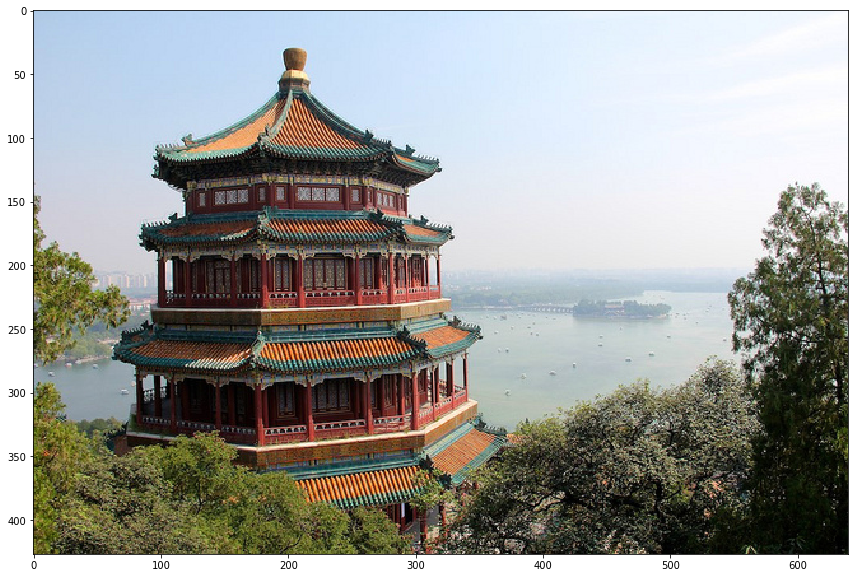

In [17]:
# Carregando a imagem do 'Summer Palace in China'
china = load_sample_image("china.jpg")

plt.figure(figsize=(15, 10))
plt.imshow(china);

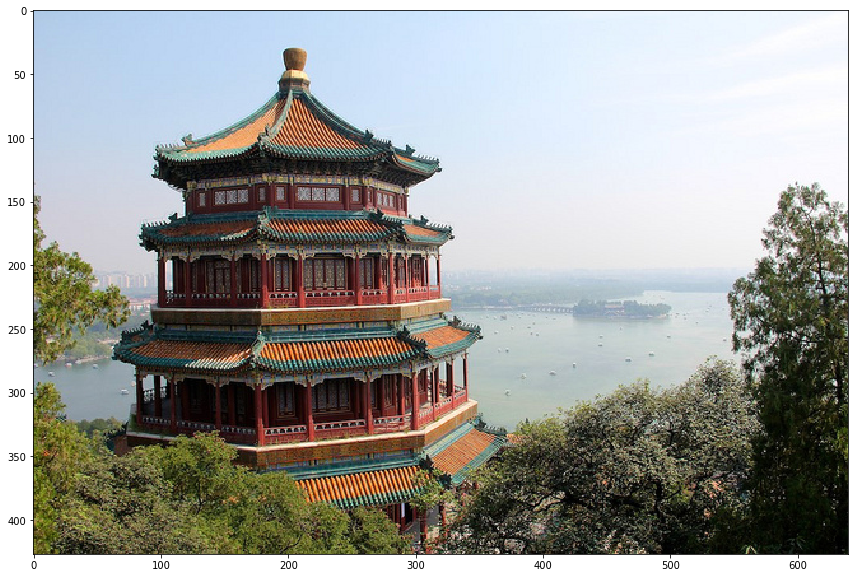

In [18]:
# Transforma a imagem com representação de cores de 8 bits (256 cores) do tipo Integer em valores do tipo Float.
# Divide o valor por 255 para chegar a um resultado entre 0 e 1 (representanado cada uma das 256 cores nesse intervalo)
china = np.array(china, dtype=np.float64) / 255

plt.figure(figsize=(15, 10))
plt.imshow(china);

In [19]:
# Uma imagem consiste em um vetor de 3 posições (Altura, Largura e RGB (A representação das cores))
# O objetivo abaixo é transforma essa imagem em um vetor de 2 posições (altura*largura E representação de cores).
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Array com", image_array.size/3, "posições")

Array com 273280.0 posições


In [20]:
# Gerando amostra aleatória de 10000 posições do array image_array
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:10000]
print("Amostra com", image_array_sample.size/3, "posições do image_array.")
print("feito em %0.3fs." % (time() - t0))

Amostra com 10000.0 posições do image_array.
feito em 0.016s.


In [21]:
# numero de centroides

def calculoAmostra(NClusters, w, h):
    t0 = time()
    print("Calculando o KMeans desse array.")
    var_kmeans = KMeans(n_clusters=NClusters, random_state=0).fit(image_array_sample)
    print("feito em %0.3fs." % (time() - t0))
    
    print("Predizendo o array total de acordo com o calculo dos centróides da amostra")
    t0 = time()
    labels = var_kmeans.predict(image_array)
    print("feito em %0.3fs." % (time() - t0))

    unique_labels = np.unique(labels)
    print(unique_labels)
    
    imageRecreate = recreate_image(var_kmeans.cluster_centers_, labels, w, h)
    return imageRecreate


# Função para reconstrução de imagem
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

Calculando o KMeans desse array.
feito em 0.047s.
Predizendo o array total de acordo com o calculo dos centróides da amostra
feito em 0.109s.
[0 1]


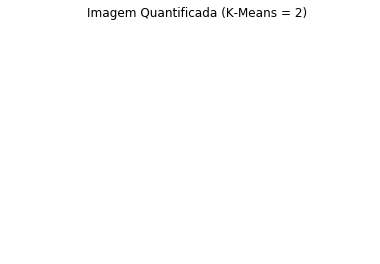

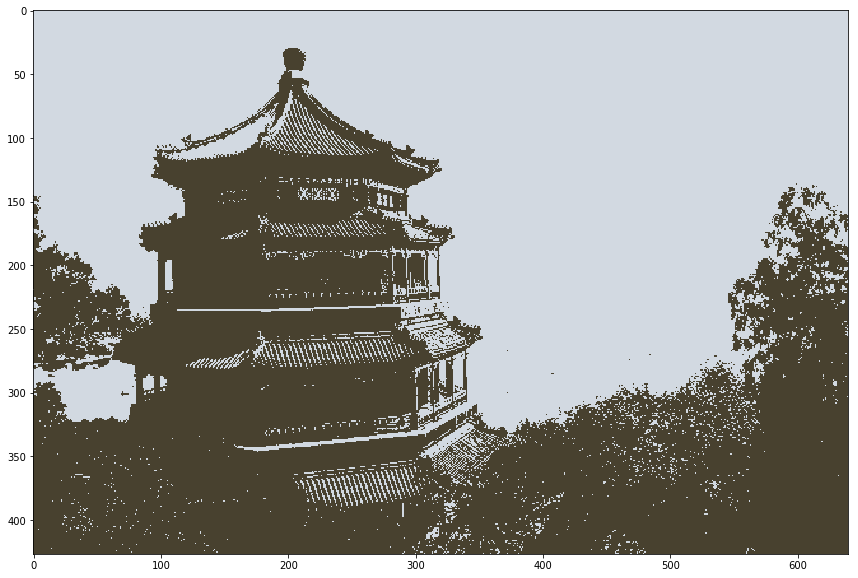

In [22]:
plt.figure(1)
plt.clf()
plt.axis('off')

plt.title('Imagem Quantificada (K-Means = 2)')
plt.figure(figsize=(15, 10))
plt.imshow(calculoAmostra(2, w, h))

Calculando o KMeans desse array.
feito em 0.172s.
Predizendo o array total de acordo com o calculo dos centróides da amostra
feito em 0.109s.
[0 1 2 3 4]


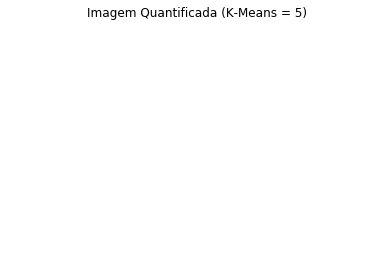

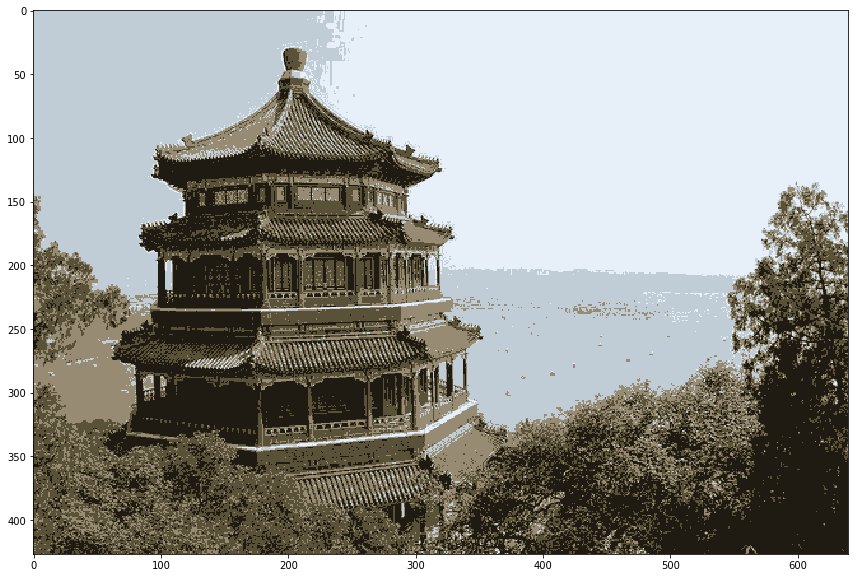

In [23]:
plt.figure(2)
plt.clf()
plt.axis('off')

plt.title('Imagem Quantificada (K-Means = 5)')
plt.figure(figsize=(15, 10))
plt.imshow(calculoAmostra(5, w, h))

Calculando o KMeans desse array.
feito em 2.046s.
Predizendo o array total de acordo com o calculo dos centróides da amostra
feito em 0.141s.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


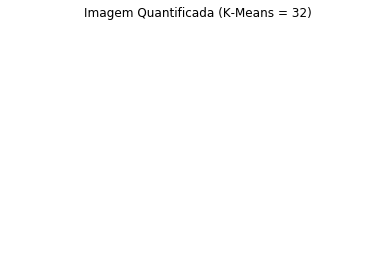

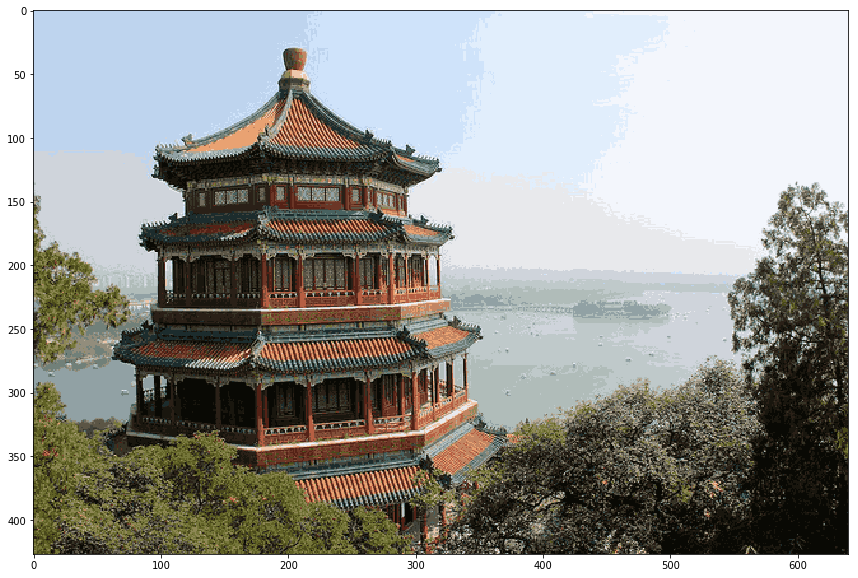

In [24]:
plt.figure(3)
plt.clf()
plt.axis('off')

plt.title('Imagem Quantificada (K-Means = 32)')
plt.figure(figsize=(15, 10))
plt.imshow(calculoAmostra(32, w, h))

Calculando o KMeans desse array.
feito em 3.958s.
Predizendo o array total de acordo com o calculo dos centróides da amostra
feito em 0.187s.
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


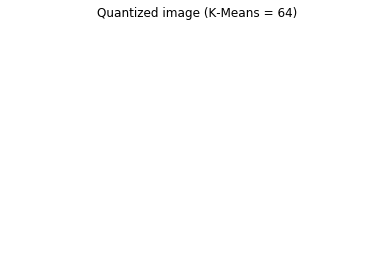

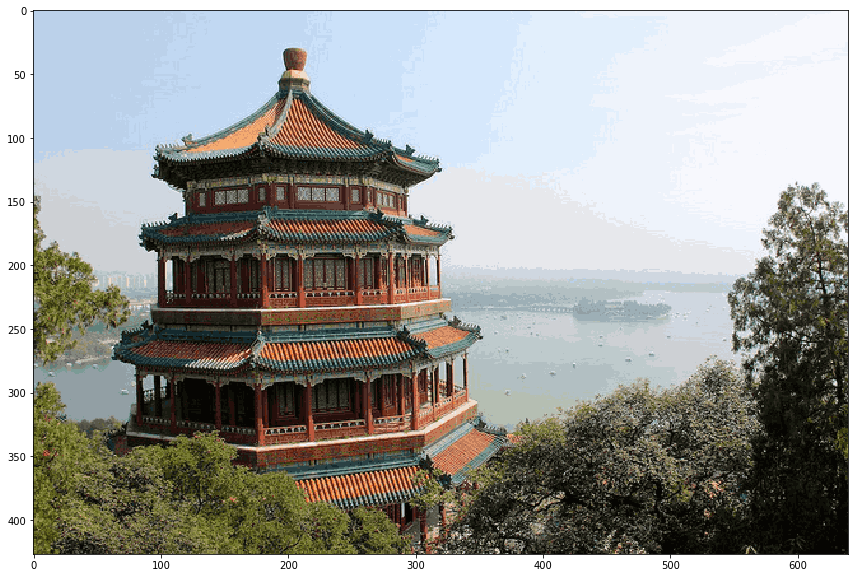

In [25]:
plt.figure(4)
plt.clf()
plt.axis('off')

plt.title('Quantized image (K-Means = 64)')
plt.figure(figsize=(15, 10))
plt.imshow(calculoAmostra(64, w, h))

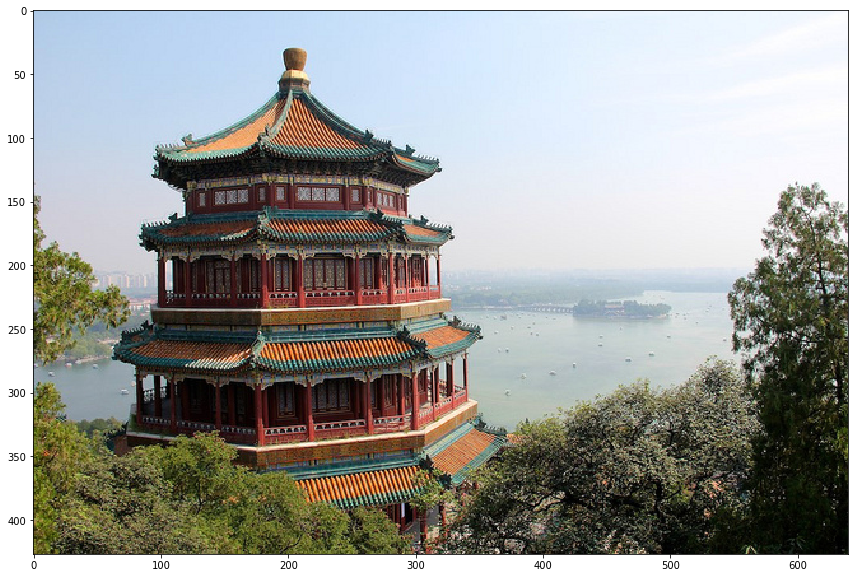

In [26]:
plt.figure(figsize=(15, 10))
plt.imshow(china);